# 共享单车数据集上的数据探索

## 导入工具包

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb  
%matplotlib inline

## 读取数据

In [3]:
df = pd.read_csv('data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## 数据总体信息

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### 字段说明

1. instant记录号
2. dteday：日期 （不作为输入特征X）
3. season：季节（1=春天、2=夏天、3=秋天、4=冬天）
4. yr：年份，(0: 2011, 1:2012)
5. mnth：月份( 1 to 12)1
6. holiday：是否是节假日
7. weekday：星期中的哪天，取值为0～6
8. workingday：是否工作日
9. weathersit：天气（1：晴天，多云 2：雾天，阴天 3：小雪，小雨 4：大雨，大雪，大雾）
10. temp：气温摄氏度
11. atemp：体感温度
12. hum：湿度
13. windspeed：风速
14. casual：非注册用户个数 （不作为输入特征X）
15. registered：注册用户个数 （不作为输入特征X）
16. cnt：给定日期（天）时间（每小时）总租车人数，响应变量y （cnt = casual + registered）

## 数据统计学信息

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## 单个特征的分布

### 离散特征的分布

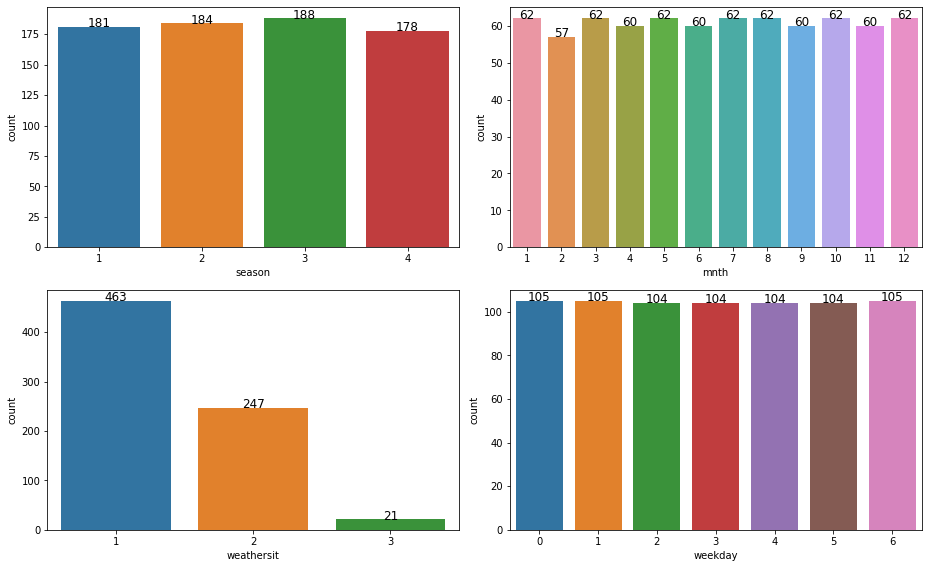

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb
#对类别型特征，观察其取值范围及柱状图
categorical_features = ['season','mnth','weathersit','weekday']

fig = plt.figure(figsize=(13,8))
for i in range(4):
    col = categorical_features[i]
    ax = fig.add_subplot(221+i)
    ax = sb.countplot(df[col], ax=ax)
    
    # 在柱状图上显示数值
    series = df[col].value_counts()
    series = series.sort_index()
    for index,value in enumerate(series.values):
        ax.text(index,value,f'{value}', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

for col in categorical_features:
#     print('\n%s属性的不同取值和出现的次数'%col)
#     print(df[col].value_counts())
    df[col] = df[col].astype('object') 
    

### 数值特征的分布

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CB32A356D8>,
      dtype=object)

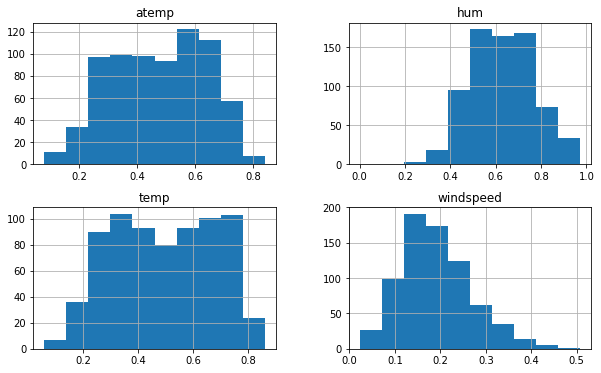

In [21]:
numerical_features = ['temp','atemp','hum','windspeed']
df[numerical_features].hist(figsize=(10,6))

## 特征与目标之间的关系

### 离散特征与目标之间的关系

#### 一年中每天的骑行量
用折线图观察一年中每天的骑行量

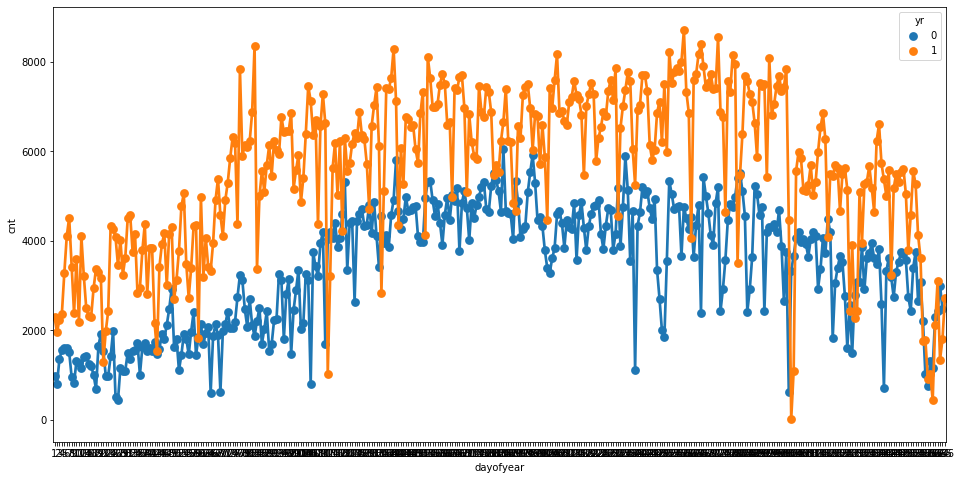

In [63]:
# 将日期转换成Timestamp格式
df['date'] = pd.to_datetime(df['dteday'])
# 再将日期转换成一年中的第几天
df['dayofyear'] = df['date'].dt.dayofyear
plt.figure(figsize=(16,8))
sb.pointplot(data=df[['dayofyear','yr','cnt']], x='dayofyear', y='cnt', hue='yr')

#### 不同季节下骑行量的分布
用提琴图观察不同季节下骑行量的分布

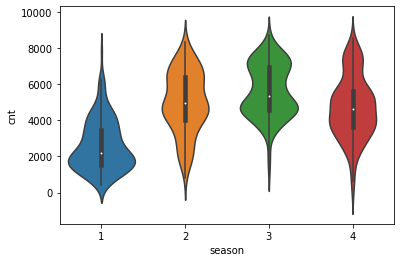

In [65]:
sb.violinplot(data=df[['season','cnt']], x='season', y='cnt')

#### 不同年份骑行量的分布
用提琴图观察不同年份骑行量的分布

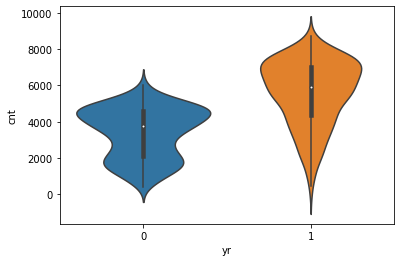

In [68]:
sb.violinplot(data=df[['yr','cnt']], x='yr', y='cnt')

#### 各个月份的骑行量
用柱状图观察各个月份的平均骑行量

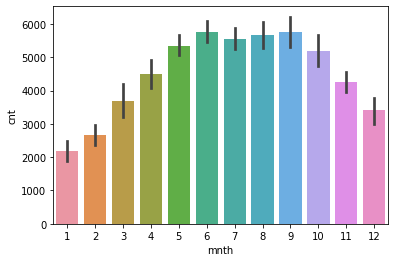

In [71]:
sb.barplot(data=df[['mnth','cnt']], x='mnth', y='cnt')

#### 节假日、工作日和骑行量的关系
用柱状图观察节假日、工作日和骑行量的关系

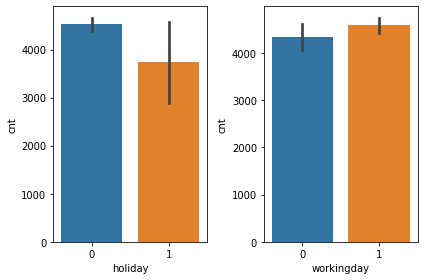

In [74]:
fig, axes = plt.subplots(1,2)
sb.barplot(data=df[['holiday','cnt']], x='holiday', y='cnt', ax=axes[0])
sb.barplot(data=df[['workingday','cnt']], x='workingday', y='cnt', ax=axes[1])
plt.tight_layout()

#### 一周中每天骑行量的分布
用柱状图观察一周中每天骑行量的分布

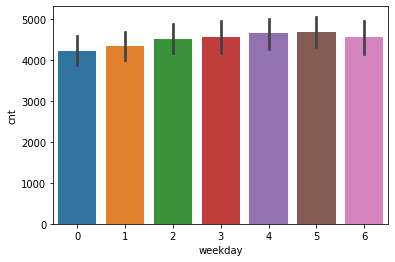

In [76]:
sb.barplot(data=df[['weekday','cnt']], x='weekday', y='cnt')

#### 天气和骑行量的关系
用柱状图观察天气和骑行量的关系

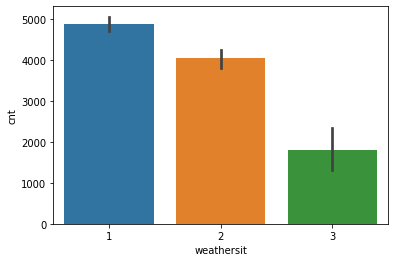

In [78]:
sb.barplot(data=df[['weathersit','cnt']], x='weathersit', y='cnt')

从图中看出，晴天骑行量最多，雾天或阴天次之，小雨或小雪最少，没有大雨或大雪的记录

### 数值型特征与目标之间的关系
用热力图观察数值型特征以及目标之间的相关性

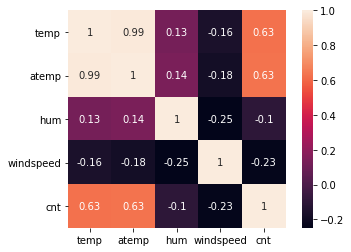

In [83]:
# 计算气温、体感温度、湿度、风速和骑行量的相关性
corr = df[['temp','atemp','hum','windspeed','cnt']].corr()
# 画出热力图
sb.heatmap(data=corr, annot=True, square=True)